In [3]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [7]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

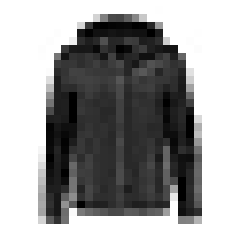

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

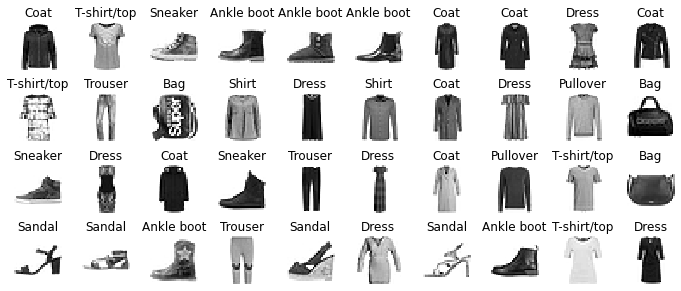

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [15]:
from keras.callbacks import History
from keras.layers import *
from keras.models import Sequential

def createModelAndPlot(optimizer):
    history = History()
    model = Sequential()
    model.add(Flatten(input_shape=(28,28,)))
    model.add(Dense(300,activation="relu"))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    model.summary()
    
    model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])
    
    model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=5, callbacks=[history])
    
    plt.plot(history.history['accuracy'], label = "tarina")
    plt.plot(history.history['val_accuracy'], label = "test")
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label = "tarina")
    plt.plot(history.history['val_loss'], label = "test")
    plt.legend()
    plt.show()
    
    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


2022-06-01 21:45:43.779404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.4990 - accuracy: 0.8224

2022-06-01 21:45:52.959478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.4990 - accuracy: 0.8224 - val_loss: 0.4341 - val_accuracy: 0.8442
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3743 - accuracy: 0.8625 - val_loss: 0.3853 - val_accuracy: 0.8617
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3393 - accuracy: 0.8754 - val_loss: 0.3746 - val_accuracy: 0.8650
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3158 - accuracy: 0.8832 - val_loss: 0.3509 - val_accuracy: 0.8736
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2974 - accuracy: 0.8899 - val_loss: 0.3483 - val_accuracy: 0.8764


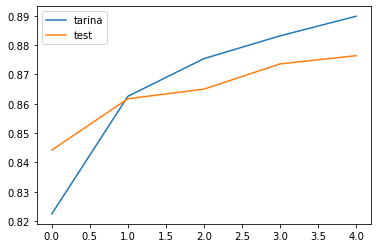

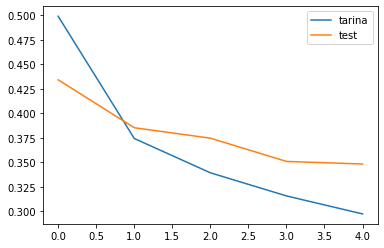

In [16]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

createModelAndPlot(sgd)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
  10/1719 [..............................] - ETA: 12s - loss: 1.7172 - accuracy: 0.4563 

2022-06-01 21:46:31.748771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.4834 - accuracy: 0.8263

2022-06-01 21:46:40.921828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.4834 - accuracy: 0.8263 - val_loss: 0.4307 - val_accuracy: 0.8355
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3628 - accuracy: 0.8647 - val_loss: 0.3735 - val_accuracy: 0.8667
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3272 - accuracy: 0.8786 - val_loss: 0.3567 - val_accuracy: 0.8706
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3018 - accuracy: 0.8873 - val_loss: 0.3891 - val_accuracy: 0.8574
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2837 - accuracy: 0.8939 - val_loss: 0.3554 - val_accuracy: 0.8722


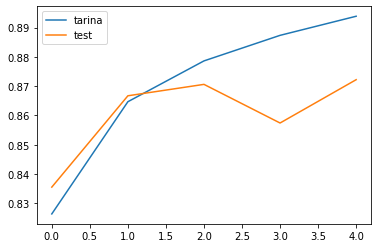

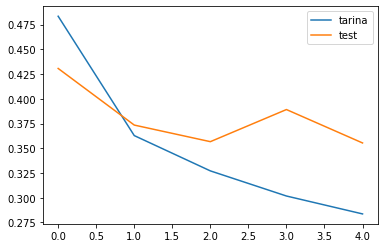

In [17]:
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

createModelAndPlot(Adam)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
  19/1719 [..............................] - ETA: 9s - loss: 2.0497 - accuracy: 0.3421

2022-06-01 21:47:20.669216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1713/1719 [============================>.] - ETA: 0s - loss: 0.5979 - accuracy: 0.8028

2022-06-01 21:47:29.513246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.5975 - accuracy: 0.8029 - val_loss: 0.4627 - val_accuracy: 0.8378
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4164 - accuracy: 0.8545 - val_loss: 0.4249 - val_accuracy: 0.8489
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3788 - accuracy: 0.8653 - val_loss: 0.3964 - val_accuracy: 0.8630
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3519 - accuracy: 0.8752 - val_loss: 0.3800 - val_accuracy: 0.8655
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3343 - accuracy: 0.8818 - val_loss: 0.3765 - val_accuracy: 0.8663


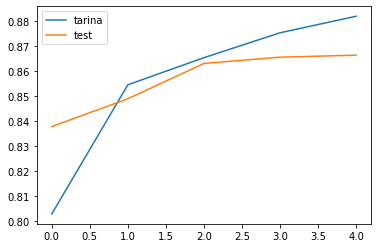

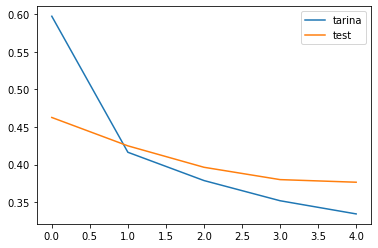

In [18]:
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

createModelAndPlot(Adam)